# Bibliotecas utilizadas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sn
import skfuzzy as fuzz

# Tratamento dos dados

In [3]:
df_original = pd.read_csv('MiningProcess_Flotation_Plant_Database.csv')

In [4]:
df_original

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,"49,75","23,2","2710,94","441,052","386,57","9,62129","1,65365","302,344","298,786",...,"313,695","392,16","430,702","872,008","418,725","497,548","446,357","416,892","64,27","1,71"
737449,2017-09-09 23:00:00,"49,75","23,2","2692,01","473,436","384,939","9,62063","1,65352","303,013","301,879",...,"236,7","401,505","404,616","864,409","418,377","506,398","372,995","426,337","64,27","1,71"
737450,2017-09-09 23:00:00,"49,75","23,2","2692,2","500,488","383,496","9,61874","1,65338","303,662","307,397",...,"225,879","408,899","399,316","867,598","419,531","503,414","336,035","433,13","64,27","1,71"
737451,2017-09-09 23:00:00,"49,75","23,2","1164,12","491,548","384,976","9,61686","1,65324","302,55","301,959",...,"308,115","405,107","466,832","876,591","407,299","502,301","340,844","433,966","64,27","1,71"


In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

In [6]:
df_rmv_date = df_original.drop('date',axis=1)

In [7]:
df_rmv_date

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235","250,576",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532","250,862",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874","250,313",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487","250,049",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136","249,895",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,"49,75","23,2","2710,94","441,052","386,57","9,62129","1,65365","302,344","298,786","299,163",...,"313,695","392,16","430,702","872,008","418,725","497,548","446,357","416,892","64,27","1,71"
737449,"49,75","23,2","2692,01","473,436","384,939","9,62063","1,65352","303,013","301,879","299,487",...,"236,7","401,505","404,616","864,409","418,377","506,398","372,995","426,337","64,27","1,71"
737450,"49,75","23,2","2692,2","500,488","383,496","9,61874","1,65338","303,662","307,397","299,487",...,"225,879","408,899","399,316","867,598","419,531","503,414","336,035","433,13","64,27","1,71"
737451,"49,75","23,2","1164,12","491,548","384,976","9,61686","1,65324","302,55","301,959","298,045",...,"308,115","405,107","466,832","876,591","407,299","502,301","340,844","433,966","64,27","1,71"


In [8]:
for dt in df_rmv_date.columns:
    df_rmv_date[dt]=df_rmv_date[dt].str.replace(',','.').astype(float)

In [9]:
df_rmv_date

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,299.163,...,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
737449,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,299.487,...,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
737450,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,299.487,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71
737451,49.75,23.20,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,298.045,...,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71


In [10]:
df_rmv_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float64
 1   % Silica Feed                 737453 non-null  float64
 2   Starch Flow                   737453 non-null  float64
 3   Amina Flow                    737453 non-null  float64
 4   Ore Pulp Flow                 737453 non-null  float64
 5   Ore Pulp pH                   737453 non-null  float64
 6   Ore Pulp Density              737453 non-null  float64
 7   Flotation Column 01 Air Flow  737453 non-null  float64
 8   Flotation Column 02 Air Flow  737453 non-null  float64
 9   Flotation Column 03 Air Flow  737453 non-null  float64
 10  Flotation Column 04 Air Flow  737453 non-null  float64
 11  Flotation Column 05 Air Flow  737453 non-null  float64
 12  Flotation Column 06 Air Flow  737453 non-nul

In [11]:
df_rmv_date.loc[:, ['% Iron Concentrate', '% Silica Concentrate']].describe()

,% Iron Concentrate,% Silica Concentrate
count,737453.000000,737453.000000
mean,65.050068,2.326763
std,1.118645,1.125554
min,62.050000,0.600000
25%,64.370000,1.440000
50%,65.210000,2.000000
75%,65.860000,3.010000
max,68.010000,5.530000


# Implementação da lógica nebulosa

In [12]:
df_final = df_rmv_date.loc[:, ['% Iron Concentrate', '% Silica Concentrate']]

df_final

,% Iron Concentrate,% Silica Concentrate
0,66.91,1.31
1,66.91,1.31
2,66.91,1.31
3,66.91,1.31
4,66.91,1.31
...,...,...
737448,64.27,1.71
737449,64.27,1.71
737450,64.27,1.71
737451,64.27,1.71


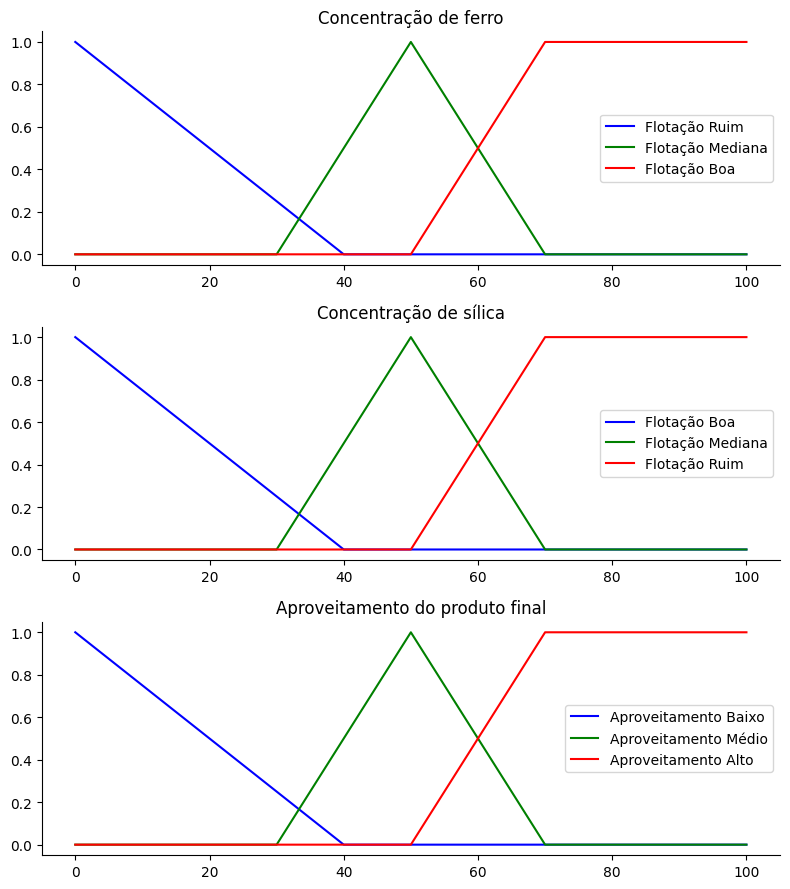

In [19]:
# CRIANDO OS CONJUNTOS FUZZY DE SUAS VARIÁVEIS
x_conc_ferro = np.arange(0, 101, 1) # Concentração de ferro vai de 0 a 100%
x_conc_silica = np.arange(0, 101, 1) # Concentração de sílica vai de 0 a 100%
x_aprov = np.arange(0, 101, 1) # Aproveitamento do produto final, que vai de 0 a 100%

conc_ferro_lo = fuzz.trapmf(x_conc_ferro, [0, 0, 0, 40])
conc_ferro_md = fuzz.trimf(x_conc_ferro, [30, 50, 70])
conc_ferro_hi = fuzz.trapmf(x_conc_ferro, [50, 70, 100, 100])

conc_silica_lo = fuzz.trapmf(x_conc_silica, [0, 0, 0, 40])
conc_silica_md = fuzz.trimf(x_conc_silica, [30, 50, 70])
conc_silica_hi = fuzz.trapmf(x_conc_silica, [50, 70, 100, 100])

aprov_lo = fuzz.trapmf(x_aprov, [0, 0, 0, 40])
aprov_md = fuzz.trimf(x_aprov, [30, 50, 70])
aprov_hi = fuzz.trapmf(x_aprov, [50, 70, 100, 100])

#Visualizando as fcs de pertinência
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_conc_ferro, conc_ferro_lo, 'b', linewidth=1.5, label='Flotação Ruim')
ax0.plot(x_conc_ferro, conc_ferro_md, 'g', linewidth=1.5, label='Flotação Mediana')
ax0.plot(x_conc_ferro, conc_ferro_hi, 'r', linewidth=1.5, label='Flotação Boa')
ax0.set_title('Concentração de ferro')
ax0.legend()

ax1.plot(x_conc_silica, conc_silica_lo, 'b', linewidth=1.5, label='Flotação Boa')
ax1.plot(x_conc_silica, conc_silica_md, 'g', linewidth=1.5, label='Flotação Mediana')
ax1.plot(x_conc_silica, conc_silica_hi, 'r', linewidth=1.5, label='Flotação Ruim')
ax1.set_title('Concentração de sílica')
ax1.legend()

ax2.plot(x_aprov, aprov_lo, 'b', linewidth=1.5, label='Aproveitamento Baixo')
ax2.plot(x_aprov, aprov_md, 'g', linewidth=1.5, label='Aproveitamento Médio')
ax2.plot(x_aprov, aprov_hi, 'r', linewidth=1.5, label='Aproveitamento Alto')
ax2.set_title('Aproveitamento do produto final')
ax2.legend()

# Ocultando os eixos
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [20]:
# FUZZYFICANDO OS DADOS (CONVERTENDO SEUS VALORES REAIS EM FUZZY)
vetor_cferro_level_lo = []
vetor_csilica_level_lo = []

vetor_cferro_level_md = []
vetor_csilica_level_md = []

vetor_cferro_level_hi = []
vetor_csilica_level_hi = []

for q in range(737452):
    conc_ferro_level_lo = fuzz.interp_membership(x_conc_ferro, conc_ferro_lo, df_final.iloc[q, df_final.columns.get_loc('% Iron Concentrate')])
    vetor_cferro_level_lo.append(conc_ferro_level_lo)

    conc_ferro_level_md = fuzz.interp_membership(x_conc_ferro, conc_ferro_md, df_final.iloc[q, df_final.columns.get_loc('% Iron Concentrate')])
    vetor_cferro_level_md.append(conc_ferro_level_md)

    conc_ferro_level_hi = fuzz.interp_membership(x_conc_ferro, conc_ferro_hi, df_final.iloc[q, df_final.columns.get_loc('% Iron Concentrate')])
    vetor_cferro_level_hi.append(conc_ferro_level_hi)

    conc_silica_level_lo = fuzz.interp_membership(x_conc_silica, conc_silica_lo, df_final.iloc[q, df_final.columns.get_loc('% Silica Concentrate')])
    vetor_csilica_level_lo.append(conc_silica_level_lo)

    conc_silica_level_md = fuzz.interp_membership(x_conc_silica, conc_silica_md, df_final.iloc[q, df_final.columns.get_loc('% Silica Concentrate')])
    vetor_csilica_level_md.append(conc_silica_level_md)

    conc_silica_level_hi = fuzz.interp_membership(x_conc_silica, conc_silica_hi, df_final.iloc[q, df_final.columns.get_loc('% Silica Concentrate')])
    vetor_csilica_level_hi.append(conc_silica_level_hi)


In [21]:
# APLICANDO AS REGRAS EM SUA INSTÂNCIA (SEU CASO ESPECÍFICO)
vetor_ativa_regra1 = []
vetor_ativa_aprov_lo1 = []

vetor_ativa_regra2 = []
vetor_ativa_aprov_lo2 = []

vetor_ativa_regra3 = []
vetor_ativa_aprov_hi3 = []

vetor_ativa_regra4 = []
vetor_ativa_aprov_lo4 = []

vetor_ativa_regra5 = []
vetor_ativa_aprov_md5 = []

vetor_ativa_regra6 = []
vetor_ativa_aprov_md6 = []

vetor_ativa_regra7 = []
vetor_ativa_aprov_lo7 = []

for q in range(737452):
    # REGRA 1: concentração de ferro baixa E concentração de sílica baixa
    ativa_regra1 = np.fmin(vetor_cferro_level_lo[q], vetor_csilica_level_lo[q])
    vetor_ativa_regra1.append(ativa_regra1)

    ativa_aprov_lo1 = np.fmin(vetor_ativa_regra1[q], aprov_lo)
    vetor_ativa_aprov_lo1.append(ativa_aprov_lo1)

    # REGRA 2: conc_ferro baixo E conc_silica alto ENTÃO aproveitamento baixo
    ativa_regra2 = np.fmin(vetor_cferro_level_lo[q], vetor_csilica_level_hi[q])
    vetor_ativa_regra2.append(ativa_regra2)

    ativa_aprov_lo2 = np.fmin(vetor_ativa_regra2[q], aprov_lo)
    vetor_ativa_aprov_lo2.append(ativa_aprov_lo2)

    # REGRA 3: conc_ferro alto E conc_silica baixo ENTÃO aproveitamento alto
    ativa_regra3 = np.fmin(vetor_cferro_level_hi[q], vetor_csilica_level_lo[q])
    vetor_ativa_regra3.append(ativa_regra3)

    ativa_aprov_hi3 = np.fmin(vetor_ativa_regra3[q], aprov_hi)
    vetor_ativa_aprov_hi3.append(ativa_aprov_hi3)

    # REGRA 4: conc_ferro alto E conc_silica alto ENTÃO aproveitamento baixo
    ativa_regra4 = np.fmin(vetor_cferro_level_hi[q], vetor_csilica_level_hi[q])
    vetor_ativa_regra4.append(ativa_regra4)

    ativa_aprov_lo4 = np.fmin(vetor_ativa_regra4[q], aprov_lo)
    vetor_ativa_aprov_lo4.append(ativa_aprov_lo4)

    # REGRA 5: conc_ferro medio E conc_silica medio ENTÃO aproveitamento medio
    ativa_regra5 = np.fmin(vetor_cferro_level_md[q], vetor_csilica_level_md[q])
    vetor_ativa_regra5.append(ativa_regra5)

    ativa_aprov_md5 = np.fmin(vetor_ativa_regra5[q], aprov_md)
    vetor_ativa_aprov_md5.append(ativa_aprov_md5)

    # REGRA 6: conc_ferro medio E conc_silica baixo ENTÃO aproveitamento medio
    ativa_regra6 = np.fmin(vetor_cferro_level_md[q], vetor_csilica_level_lo[q])
    vetor_ativa_regra6.append(ativa_regra6)

    ativa_aprov_md6 = np.fmin(vetor_ativa_regra6[q], aprov_md)
    vetor_ativa_aprov_md6.append(ativa_aprov_md6)

    # REGRA 7: conc_ferro medio E conc_silica alto ENTÃO aproveitamento baixo
    ativa_regra7 = np.fmin(vetor_cferro_level_md[q], vetor_csilica_level_hi[q])
    vetor_ativa_regra7.append(ativa_regra7)

    ativa_aprov_lo7 = np.fmin(vetor_ativa_regra7[q], aprov_lo)
    vetor_ativa_aprov_lo7.append(ativa_aprov_lo7)

aprov0 = np.zeros_like(x_aprov)

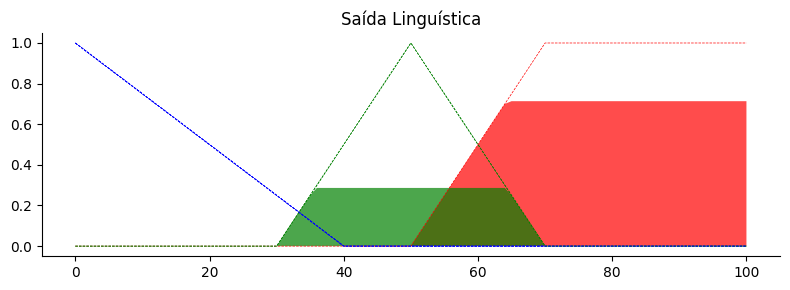

In [22]:
# Visualizando o conjunto de regras aplicadas
fig, ax0 = plt.subplots(figsize=(8, 3))

# PLOT REGRA 1
ax0.fill_between(x_aprov, aprov0, vetor_ativa_aprov_lo1[737451], facecolor='b', alpha=0.7)
ax0.plot(x_aprov, aprov_lo, 'b', linewidth=0.5, linestyle='--', )

# PLOT REGRA 2
ax0.fill_between(x_aprov, aprov0, vetor_ativa_aprov_lo2[737451], facecolor='b', alpha=0.7)
ax0.plot(x_aprov, aprov_lo, 'b', linewidth=0.5, linestyle='--')

# PLOT REGRA 3
ax0.fill_between(x_aprov, aprov0, vetor_ativa_aprov_hi3[737451], facecolor='r', alpha=0.7)
ax0.plot(x_aprov, aprov_hi, 'r', linewidth=0.5, linestyle='--')

# PLOT REGRA 4
ax0.fill_between(x_aprov, aprov0, vetor_ativa_aprov_lo4[737451], facecolor='b', alpha=0.7)
ax0.plot(x_aprov, aprov_lo, 'b', linewidth=0.5, linestyle='--')

# PLOT REGRA 5
ax0.fill_between(x_aprov, aprov0, vetor_ativa_aprov_md5[737451], facecolor='g', alpha=0.7)
ax0.plot(x_aprov, aprov_md, 'g', linewidth=0.5, linestyle='--')

# PLOT REGRA 6
ax0.fill_between(x_aprov, aprov0, vetor_ativa_aprov_md6[737451], facecolor='g', alpha=0.7)
ax0.plot(x_aprov, aprov_md, 'g', linewidth=0.5, linestyle='--')

# PLOT REGRA 7
ax0.fill_between(x_aprov, aprov0, vetor_ativa_aprov_lo7[737451], facecolor='b', alpha=0.7)
ax0.plot(x_aprov, aprov_lo, 'b', linewidth=0.5, linestyle='--')

ax0.set_title('Saída Linguística')

# Oculta eixos
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [23]:
# ETAPA 5: Inferência
vetor_inferencia = []
for q in range(737452):
    inferencia = np.fmax( vetor_ativa_aprov_lo1[q], np.fmax( vetor_ativa_aprov_lo2[q] , np.fmax( vetor_ativa_aprov_hi3[q] , np.fmax( vetor_ativa_aprov_lo4[q] , np.fmax( vetor_ativa_aprov_md5[q] , np.fmax( vetor_ativa_aprov_md6[q] , vetor_ativa_aprov_lo7[q] ) ) ) ) ) )
    vetor_inferencia.append(inferencia)

In [24]:
# ETAPA 6: Calculando o RESULTADO DEFUZZIFICADO
vetor_aprov_final = []
vetor_ativa_aprov = []

for q in range(737452):
    aprov_final = fuzz.defuzz(x_aprov, vetor_inferencia[q], 'centroid')
    vetor_aprov_final.append(aprov_final)

    ativa_aprov = fuzz.interp_membership(x_aprov, vetor_inferencia[q], vetor_aprov_final[q])
    vetor_ativa_aprov.append(ativa_aprov) # plotando

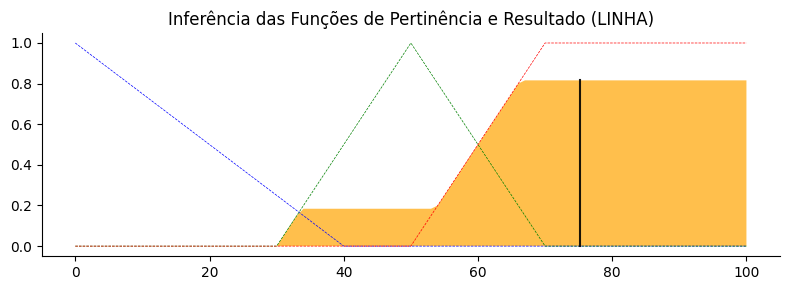

In [25]:
# Visualizando o resultado
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_aprov, aprov_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_aprov, aprov_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_aprov, aprov_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_aprov, aprov0, vetor_inferencia[500000], facecolor='Orange', alpha=0.7)
ax0.plot([vetor_aprov_final[500000], vetor_aprov_final[500000]], [0, vetor_ativa_aprov[500000]], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Inferência das Funções de Pertinência e Resultado (LINHA)')

# Ocultando os eixos x e y
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [26]:
vetor_aprov_final

[75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,
 75.91863201118251,


In [27]:
df_Rotulo = pd.DataFrame(vetor_aprov_final)

df_Rotulo.columns = ['Aprov']

df_Rotulo

,Aprov
0,75.918632
1,75.918632
2,75.918632
3,75.918632
4,75.918632
...,...
737447,72.771156
737448,72.771156
737449,72.771156
737450,72.771156


In [29]:
df_Rotulo.describe()

,Aprov
count,737452.000000
mean,73.700608
std,1.344512
min,70.051666
25%,72.892337
50%,73.898433
75%,74.672662
max,77.220255


In [28]:
df_concluido = pd.concat([df_rmv_date.loc[:, ['% Iron Feed', '% Silica Feed']], df_Rotulo], axis=1)

df_concluido.drop(737452)

,% Iron Feed,% Silica Feed,Aprov
0,55.20,16.98,75.918632
1,55.20,16.98,75.918632
2,55.20,16.98,75.918632
3,55.20,16.98,75.918632
4,55.20,16.98,75.918632
...,...,...,...
737447,49.75,23.20,72.771156
737448,49.75,23.20,72.771156
737449,49.75,23.20,72.771156
737450,49.75,23.20,72.771156
